In [1]:
#Import necessary libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline  

In [2]:
results = pd.read_excel('C:\\Users\\walshn4\\Desktop\\Worldcuppool\\Master results.xlsx')

In [3]:
results

,Group A,Group B,Group C,Group D,Group E,Group F,Group G,Group H,Round 2,Quarter finals,Semi Finals,Final,final winner,Playoff winner
0,uraguay,spain,france,croatia,brazil,sweden,belgium,colombia,uraguay,uraguay,france,france,france,belgium
1,russia,portugal,denmark,argentina,switzerland,mexico,england,japan,portugal,france,belgium,croatia,NaN,NaN
2,saudi arabia,iran,peru,nigeria,serbia,south korea,tunisia,senegal,france,brazil,croatia,NaN,NaN,NaN
3,egypt,morocco,austraila,iceland,costa rica,germany,panama,poland,argentina,belgium,england,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,brazil,russia,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mexico,croatia,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,belgium,sweden,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,japan,england,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,spain,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,russia,NaN,NaN,NaN,NaN,NaN


to get the group results from the final table we first create an empty list
we then iterate through the column headers for each group and append the team positions 
in each  group to the list
We then convert the list to a pd series(column) so we can use it for boolean comparison 

In [4]:
group_list = []
for group in list(results)[:8]:
    for team_position in results[group].head(4):
        group_list.append(team_position)
group_final = pd.Series(group_list)
group_final

0           uraguay
1            russia
2     saudi arabia 
3             egypt
4             spain
5          portugal
6              iran
7           morocco
8            france
9           denmark
10             peru
11        austraila
12          croatia
13        argentina
14          nigeria
15          iceland
16           brazil
17      switzerland
18           serbia
19       costa rica
20           sweden
21           mexico
22      south korea
23          germany
24          belgium
25          england
26          tunisia
27           panama
28         colombia
29            japan
30          senegal
31           poland
dtype: object

In [5]:
results_table =  pd.DataFrame(dtype=np.int8, columns = ['Entrantname', 'GP Points', 'SR Points', 'Quarter Points', 'Semi Points','Final Points', 'Playoff Winner Points', 'Winner Points', 'Total Points'])
results_table['Entrantname'] = results_table['Entrantname'].astype(str)
results_table.columns

Index(['Entrantname', 'GP Points', 'SR Points', 'Quarter Points',
       'Semi Points', 'Final Points', 'Playoff Winner Points', 'Winner Points',
       'Total Points'],
      dtype='object')

In [6]:
def get_file_extension(file_name):
    # We get the size of a string
    size = len(file_name) - 1

    # We look for the position where the last point was placed
    found = False
    while found == False and size >= 0:
        if file_name[size] == '.':
            found = True
        else:
            size = size - 1
            
    # We collect the extension
    if found == True:
        extension = file_name[(size+1):(len(file_name))]
    else:
        extension = ''
        
    # We return the extension
    return extension

In [7]:
def select_files_from_directory_with_real_extension(directory, extension):
    # We get the current directory and ask for all its elements
    os.chdir(directory)
    dir = os.getcwd()
    files = os.listdir(dir)

    # We create a list with all files we are interested at
    # Initially, the list is empty
    selected_files = []

    # We traverse the files of the directory to select the ones we are interested at
    for i in range(0, len(files)):
        name = files[i]
        # If the file is not a subdirectory and has csv extension then we pick it
        if os.path.isdir(name) == False and get_file_extension(name) == extension:
            selected_files.append(name)

    # We return the list of files
    return selected_files

In [8]:
def get_results(directory, extension):
    #  We get the files to be processed
    input_files = select_files_from_directory_with_real_extension(directory, extension)
    
    # we split the input file name to get a list of entrant names
    names_list = [i.split('.')[0] for i in input_files]
    
    #create an empty list to store predicted 
    final_winners = []
    
    #entrant = pd.read_csv("C:\\Users\\walshn4\\Desktop\\Worldcuppool\\Entrants\\Ian Mc Carthy.csv")
    #  We process them
    for i in range(0, len(input_files)):
        
        #  We convert the file to a pd dataframe
        entrant = pd.read_csv(input_files[i])
        # set rownum to be order of entrant files
        
        # append the predictied winner to winners list
        final_winners.append(entrant['final winner'].dropna().loc[0])
        # rownum is equal to the iteration number
        rownum = i
        
        # enter the name into the corresponding cell
        results_table.at[rownum, 'Entrantname'] = names_list[i]
        # repeat of the results table group positions for each entrant table
        gplist = []
        for group in list(entrant)[:8]:
            for team_position in entrant[group].head(4):
                gplist.append(team_position)        
        gp_entrant = pd.Series(gplist)
        
        # to get the points for each allocation we must sum a boolean array and multiply it by the points 
        # .loc is used to select specific rows in a column
        # .iloc is used to select specific rows and columns in a dataframe

        # Group position
        results_table.at[rownum, 'GP Points'] = int(sum(group_final == gp_entrant) * 2)
        
        # Second Round
        sr_score = 0
        for team in entrant['Round 2']:
            if team in list(results['Round 2']):
                sr_score += 3     
        results_table.at[rownum, 'SR Points'] = sr_score
        
        # Quarter Final Points
        qf_score = 0
        for team in entrant['Quarter finals'].loc[:7]:
            if team in list(results['Quarter finals'].loc[:7]):
                qf_score += 4
        results_table.at[rownum, 'Quarter Points'] = qf_score
        
        # Semi Final Points
        semi_score = 0
        for team in entrant['Semi Finals'].loc[:3]:
            if team in list(results['Semi Finals'].loc[:3]):
                semi_score += 5
        results_table.at[rownum,'Semi Points'] = semi_score
        
        # Final Points
        final = 0
        for team in entrant['Final'].loc[:1]:
            if team in list(results['Final'].loc[:1]):
                final += 6
        results_table.at[rownum,'Final Points'] = final
        
        # Playoff Winner
        results_table.at[rownum, 'Playoff Winner Points'] = sum(entrant['Playoff winner'].loc[:0] == results['Playoff winner'].loc[:0]) * 6
        # Final Winner
        results_table.at[rownum, 'Winner Points'] = sum(entrant['final winner'].loc[:0] == results['final winner'].loc[:0]) * 10
        # Total Points
        results_table.at[rownum, 'Total Points'] = results_table.iloc[[rownum], 1:].sum(axis = 1) 
        
    # sort the table in descending order on total points 
    final_table = results_table.sort_values(by='Total Points', ascending=False)
    # export the final table to csv
    final_table.to_csv("C:\\..\\Final Results.csv", index = False)
    
    winners = pd.DataFrame( pd.Series(final_winners).value_counts().reset_index())
    
    return final_table, winners


In [9]:
def graph_distribution(final_table):
    
    plt.figure()   
    sns.distplot(final_table['GP Points'], kde = True,  hist = False, kde_kws={ "label": 'Group Position Points', 'color': 'red'})
    sns.distplot(final_table['SR Points'], kde = True, hist = False, kde_kws={ "label": 'Second Round Points', 'color': 'royalblue'})
    sns.distplot(final_table['Quarter Points'],   kde = True, hist = False, kde_kws={ "label": 'Quarter Final Points', 'color': 'green'})
    sns.distplot(final_table['Total Points'], kde = True, hist = False, kde_kws={ "label": 'Total Points', 'color': 'gold'} )
    plt.xlabel("Points")
    plt.ylabel("Density")
    plt.xticks(np.arange(0,120, 10))
    plt.title('Distribution of Results')



In [10]:
def graph_winners(winners):
    #rename columns
    winners.columns = ['Team name', 'Count']
    # vertical bar plot 
    sns.barplot(x = 'Team name', y = 'Count', data = winners, palette = "RdYlBu")
    plt.title('Winner Predictions')
    plt.xlabel("")
    plt.xticks(rotation=45)
    plt.tight_layout()

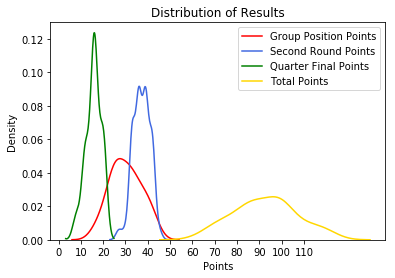

In [11]:
def my_main():
    # Select the directory and the extension
    directory = "C:\\Users\\walshn4\\Desktop\\Worldcuppool\\Entrants"
    extension = "csv"
    
    # call the function to get results
    final_table, winners = get_results(directory, extension)
    
    #graph_distribution(final_table)
    plt.figure()   
    sns.distplot(final_table['GP Points'], kde = True,  hist = False, kde_kws={ "label": 'Group Position Points', 'color': 'red'})
    sns.distplot(final_table['SR Points'], kde = True, hist = False, kde_kws={ "label": 'Second Round Points', 'color': 'royalblue'})
    sns.distplot(final_table['Quarter Points'],   kde = True, hist = False, kde_kws={ "label": 'Quarter Final Points', 'color': 'green'})
    sns.distplot(final_table['Total Points'], kde = True, hist = False, kde_kws={ "label": 'Total Points', 'color': 'gold'} )
    plt.xlabel("Points")
    plt.ylabel("Density")
    plt.xticks(np.arange(0,120, 10))
    plt.title('Distribution of Results')
    #graph_winners(winners)
    
#           PYTHON EXECUTION
# This is the main entry point to the execution of our program.
# It provides a call to the 'main function' defined in our
# Python program, making the Python interpreter to trigger
# its execution.

if __name__ == '__main__':
    my_main()
